In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import json
from sklearn.linear_model import LinearRegression

In [2]:
results_json = 'results_final.json'

with open(results_json, 'r') as json_file:
    results = json.load(json_file)

print(results)
print(len(results))

[{'parameters': {'literals_count': '5', 'clauses_count': '15', 'iteration': '1', 'problem_num': '077', 'qubo_formulation_time': '0.8230276107788086', 'model_formulation_time': '0.0009887218475341797'}, 'iteration_results': [{'solver': 'FixStars10s', 'results': {'max_clauses_satisfied_Obj': '14.0000000000000', 'max_clauses_satisfied_Verified': '15', 'execution_time': '0.039405', 'total_time': '10.799092054367065'}}, {'solver': 'Gurobi10s', 'results': {'max_clauses_satisfied_Obj': '14.0000000000000', 'max_clauses_satisfied_Verified': '15', 'execution_time': '0.005409', 'total_time': '0.014002561569213867'}}, {'solver': 'DWave6.4', 'results': {'max_clauses_satisfied_Obj': '14.0000000000000', 'max_clauses_satisfied_Verified': '15', 'execution_time': '0.095805', 'total_time': '4.43706750869751'}}]}, {'parameters': {'literals_count': '5', 'clauses_count': '15', 'iteration': '2', 'problem_num': '077', 'qubo_formulation_time': '0.380448579788208', 'model_formulation_time': '0.0'}, 'iteration_r

In [3]:
benchmarkSets_literals_count = [5, 10, 15, 20, 50, 75, 100, 125]
benchmarkSets_clauses_count = [15, 30, 55, 91, 218, 325, 430, 538]
solvers_name = ["FixStars10s", "Gurobi10s", "DWave6.4"]
QUBO_size = np.array(benchmarkSets_clauses_count) + np.array(benchmarkSets_literals_count)
print("QUBO_size:", QUBO_size)

QUBO_size: [ 20  40  70 111 268 400 530 663]


In [4]:
print(np.diff(QUBO_size))

[ 20  30  41 157 132 130 133]


In [5]:
for benchmarkSet in results:
    # print(benchmarkSet["parameters"])
    # print(benchmarkSet["iteration_results"][2]["results"]["execution_time"])
    if (benchmarkSet["iteration_results"][2]["results"]["execution_time"] == "None"):
        print("None ldoedfn")
    # print(benchmarkSet["iteration_results"][2]["solver"])
    # print("\n")

None ldoedfn
None ldoedfn
None ldoedfn
None ldoedfn
None ldoedfn
None ldoedfn
None ldoedfn
None ldoedfn
None ldoedfn
None ldoedfn


In [6]:
def rename_solvers(solver: str):
    if solver == "FixStars10s":
        return "Fixstars 10s"
    if solver == "Gurobi10s":
        return "Gurobi 10s"
    if solver == "DWave6.4":
        return "D-Wave AS6.4"
    print("Warning: Unexpected Solver Name")
    return solver

default_color_shift_1 = ["#ff7f0e", "#2ca02c", "#d62728"]
solver_order = ["Gurobi 10s", "Fixstars 10s", "D-Wave AS6.4"]

    nodes        solver  success
0      20  D-Wave AS6.4      1.0
1      20  Fixstars 10s      1.0
2      20    Gurobi 10s      1.0
3      40  D-Wave AS6.4      1.0
4      40  Fixstars 10s      1.0
5      40    Gurobi 10s      1.0
6      70  D-Wave AS6.4      1.0
7      70  Fixstars 10s      1.0
8      70    Gurobi 10s      1.0
9     111  D-Wave AS6.4      1.0
10    111  Fixstars 10s      1.0
11    111    Gurobi 10s      1.0
12    268  D-Wave AS6.4      1.0
13    268  Fixstars 10s      1.0
14    268    Gurobi 10s      1.0
15    400  D-Wave AS6.4      1.0
16    400  Fixstars 10s      1.0
17    400    Gurobi 10s      1.0
18    530  D-Wave AS6.4      1.0
19    530  Fixstars 10s      1.0
20    530    Gurobi 10s      1.0
21    663  D-Wave AS6.4      0.0
22    663  Fixstars 10s      1.0
23    663    Gurobi 10s      1.0


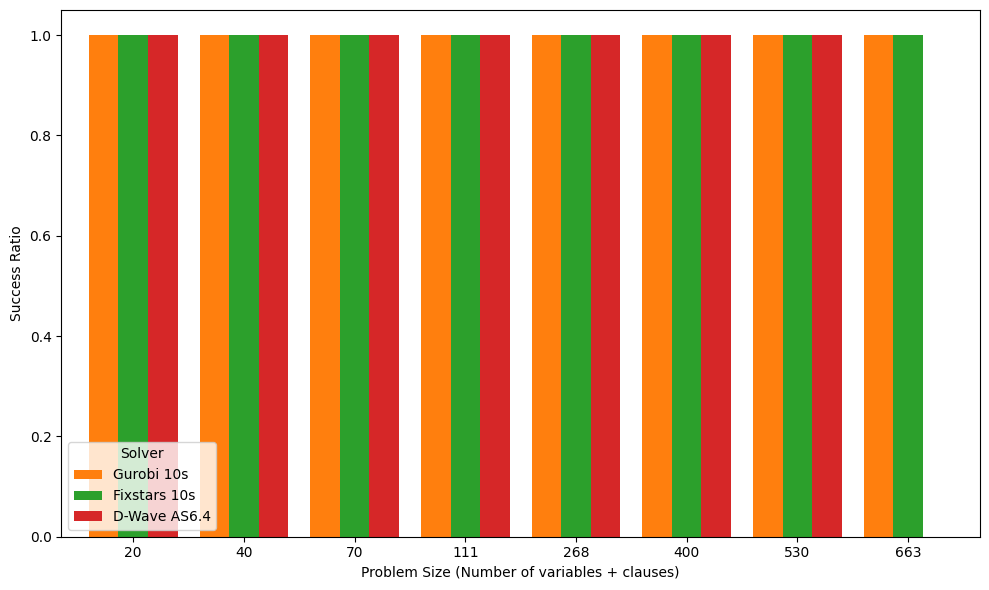

In [8]:
# Prepare data for plotting
records = []
for item in results:
    problem_size = int(item["parameters"]["literals_count"]) + \
        int(item["parameters"]["clauses_count"])
    for solver in item["iteration_results"]:
        success = (solver["results"]["execution_time"] != "None")
        records.append({"nodes": problem_size, "solver": rename_solvers(
            solver["solver"]), "success": int(success)})

# Convert to DataFrame
df = pd.DataFrame(records)


success_ratio = df.groupby(["nodes", "solver"]).mean().reset_index()
print(success_ratio)
# Pivot data for plotting
pivot_data = success_ratio.pivot(
    index="nodes", columns="solver", values="success").fillna(0)

# Ensure legend order
# solver_order = ["Gurobi 10s", "Fixstars 10s", "D-Wave AS6.4"]
pivot_data = pivot_data[solver_order]

# Plot multi-bar chart
ax = pivot_data.plot(kind="bar", figsize=(10, 6), width=0.8, color=default_color_shift_1)
# plt.title("Success Ratio by Solver for Each Node Value")
ax.set_xlabel("Problem Size (Number of variables + clauses)")
ax.set_ylabel("Success Ratio")
ax.legend(title="Solver", loc="lower left")
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.tight_layout()
plt.show()

    nodes        solver  accuracy
0      20  D-Wave AS6.4  1.000000
1      20  Fixstars 10s  1.000000
2      20    Gurobi 10s  1.000000
3      40  D-Wave AS6.4  0.990000
4      40  Fixstars 10s  0.986667
5      40    Gurobi 10s  0.980000
6      70  D-Wave AS6.4  0.970909
7      70  Fixstars 10s  1.000000
8      70    Gurobi 10s  0.996364
9     111  D-Wave AS6.4  0.970330
10    111  Fixstars 10s  1.000000
11    111    Gurobi 10s  1.000000
12    268  D-Wave AS6.4  0.975229
13    268  Fixstars 10s  1.000000
14    268    Gurobi 10s  0.999541
15    400  D-Wave AS6.4  0.956615
16    400  Fixstars 10s  1.000000
17    400    Gurobi 10s  0.987692
18    530  D-Wave AS6.4  0.957209
19    530  Fixstars 10s  1.000000
20    530    Gurobi 10s  0.975814
21    663  D-Wave AS6.4  0.000000
22    663  Fixstars 10s  0.998327
23    663    Gurobi 10s  0.971747


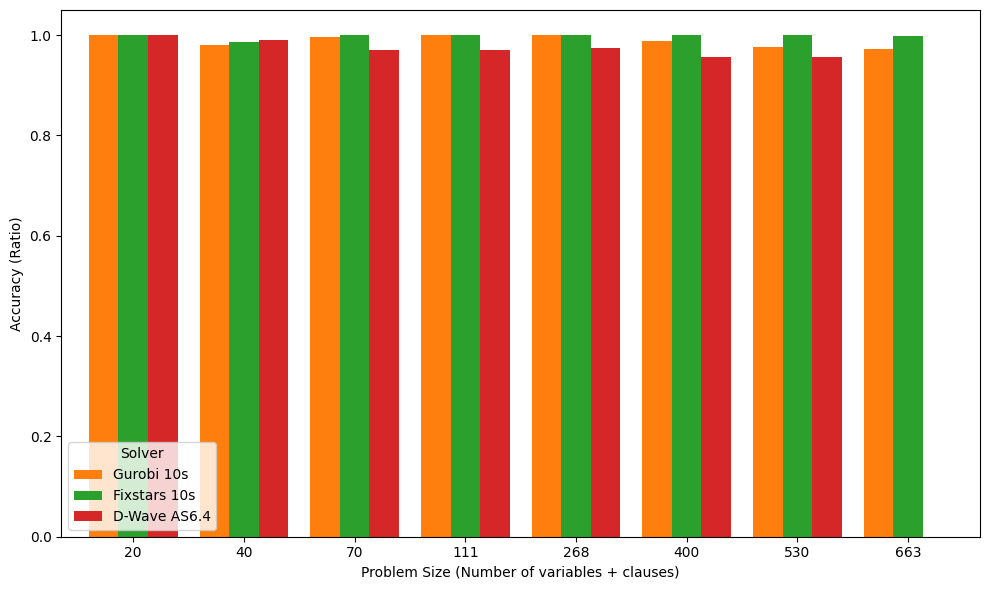

In [12]:
# Prepare data for plotting accuracy
accuracy_data = []
for item in results:
    problem_size = int(item["parameters"]["literals_count"]) + int(item["parameters"]["clauses_count"])
    # Find the best objective value for the current dataset
    for solver in item["iteration_results"]:
        if (solver["results"]["execution_time"] != "None"):
            satisfied_clauses_ratio = int(solver["results"]["max_clauses_satisfied_Verified"]) / int(item["parameters"]["clauses_count"])
        else:
            satisfied_clauses_ratio = 0
        accuracy_data.append({"nodes": problem_size, "solver": rename_solvers(solver["solver"]), "accuracy": satisfied_clauses_ratio})

# Convert to DataFrame
df_accuracy = pd.DataFrame(accuracy_data)

# Group by nodes and solver to calculate accuracy percentage
accuracy_counts = df_accuracy.groupby(["nodes", "solver"]).mean().reset_index()
print(accuracy_counts)

# Pivot data for plotting
pivot_accuracy = accuracy_counts.pivot(index="nodes", columns="solver", values="accuracy").fillna(0)

# Ensure legend order
# solver_order = ["Gurobi10s", "FixStars10s", "DWave6.4"]
pivot_accuracy = pivot_accuracy[solver_order]

# Plot multi-bar chart for accuracy
pivot_accuracy.plot(kind="bar", figsize=(10, 6), width=0.8, color=default_color_shift_1)
# plt.title("Accuracy of Each Solver for Each Node Value")
plt.xlabel("Problem Size (Number of variables + clauses)")
plt.ylabel("Accuracy (Ratio)")
plt.legend(title="Solver", loc="lower left")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


    nodes        solver  execution_time
0      20  D-Wave AS6.4        0.095803
1      20  Fixstars 10s        0.039556
2      20    Gurobi 10s        0.006982
3      40  D-Wave AS6.4        0.106503
4      40  Fixstars 10s        0.059013
5      40    Gurobi 10s        0.008368
6      70  D-Wave AS6.4        0.126205
7      70  Fixstars 10s        0.058341
8      70    Gurobi 10s        0.010578
9     111  D-Wave AS6.4        0.190226
10    111  Fixstars 10s        0.060534
11    111    Gurobi 10s        0.301275
12    268  D-Wave AS6.4        0.193467
13    268  Fixstars 10s        0.083851
14    268    Gurobi 10s        4.093816
15    400  D-Wave AS6.4        0.211567
16    400  Fixstars 10s        0.739464
17    400    Gurobi 10s        7.964575
18    530  D-Wave AS6.4        0.227981
19    530  Fixstars 10s        0.227942
20    530    Gurobi 10s        1.086822
21    663  D-Wave AS6.4        0.000000
22    663  Fixstars 10s        0.683644
23    663    Gurobi 10s        3.096363


/var/folders/st/gc3zqypj7nl7chvnnfvbtzrc0000gn/T/ipykernel_35058/3541447463.py:20: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  ax = sns.boxplot(x="nodes", y="execution_time", hue="solver", data=df_plot, palette=custom_palette, hue_order=solver_order)


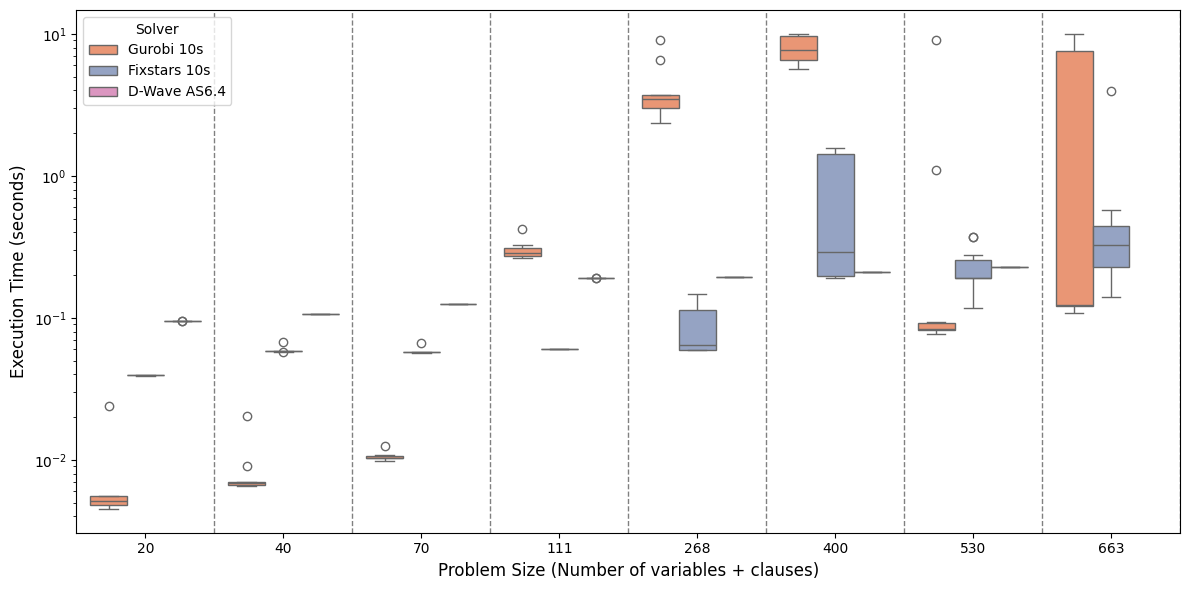

In [30]:
# Prepare data for plotting
plot_data = []
for item in results:
    problem_size = int(item["parameters"]["literals_count"]) + int(item["parameters"]["clauses_count"])
    for solver in item["iteration_results"]:
        plot_data.append({
            "nodes": problem_size,
            "solver": rename_solvers(solver["solver"]),
            "execution_time": float(solver["results"]["execution_time"]) if solver["results"]["execution_time"] != "None" else 0
        })

# Convert to DataFrame
df_plot = pd.DataFrame(plot_data)
time = df_plot.groupby(["nodes", "solver"]).mean().reset_index()
print(time)
# Box and Whisker Plot for execution_time vs nodes
plt.figure(figsize=(12, 6))
set2_palette = sns.color_palette("Set2")
custom_palette = [set2_palette[1]] + set2_palette[2:] + [set2_palette[0]]
ax = sns.boxplot(x="nodes", y="execution_time", hue="solver", data=df_plot, palette=custom_palette, hue_order=solver_order)

# Add title and labels
# plt.title('Box and Whisker Plot of Execution Time vs Nodes', fontsize=16)
plt.xlabel("Problem Size (Number of variables + clauses)", fontsize=12)
plt.ylabel('Execution Time (seconds)', fontsize=12)

# Add vertical lines as guidelines to separate each "nodes" group
nodes = df_plot['nodes'].unique()
for node in nodes:
    plt.axvline(x=list(nodes).index(node) + 0.5, color='gray', linestyle='--', linewidth=1)

plt.yscale("log")
ax.legend(title="Solver")

# Show the plot
plt.tight_layout()
plt.show()

     nodes    solver  execution_time
2       20  DWave6.4        0.095805
5       20  DWave6.4        0.095802
8       20  DWave6.4        0.095805
11      20  DWave6.4        0.095802
14      20  DWave6.4        0.095802
..     ...       ...             ...
197    530  DWave6.4        0.227980
200    530  DWave6.4        0.227981
203    530  DWave6.4        0.227981
206    530  DWave6.4        0.227980
209    530  DWave6.4        0.227980

[70 rows x 3 columns]


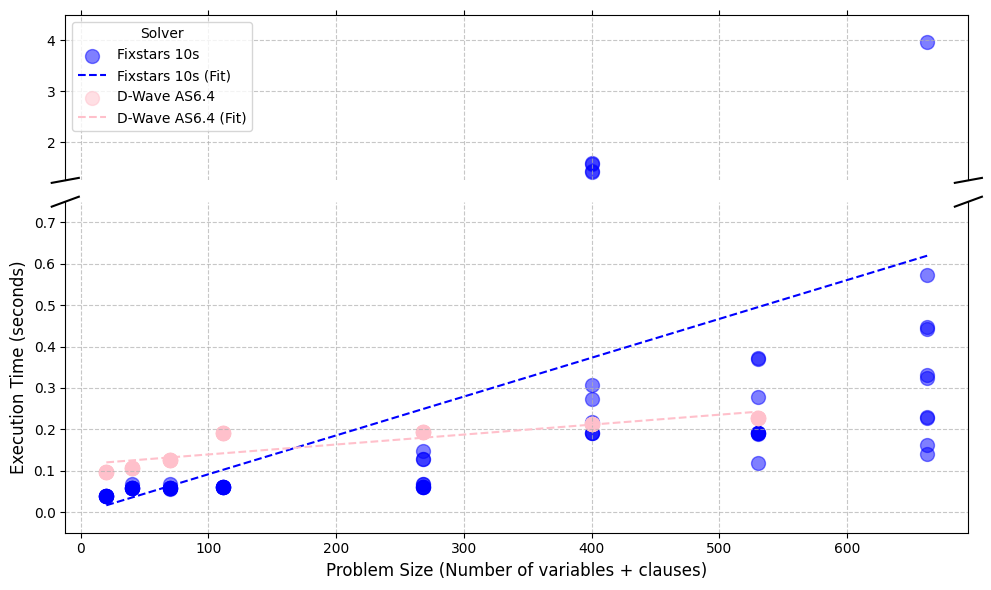

In [24]:
# Prepare data for plotting
plot_data = []
for item in results:
    problem_size = int(item["parameters"]["literals_count"]) + int(item["parameters"]["clauses_count"])
    for solver in item["iteration_results"]:
        plot_data.append({
            "nodes": problem_size,
            "solver": solver["solver"],
            "execution_time": float(solver["results"]["execution_time"]) if solver["results"]["execution_time"] != "None" else 0
        })

# Convert to DataFrame
df_plot = pd.DataFrame(plot_data)

# Filter data for Fixstars and D-Wave
# fixstars1s_data = df_plot[df_plot["solver"] == "Fixstars 1s"]
fixstars10s_data = df_plot[df_plot["solver"] == "FixStars10s"]
# dwave41_data = df_plot[df_plot["solver"] == "D-Wave AS4.1"]
dwave64_data = df_plot[df_plot["solver"] == "DWave6.4"]
dwave64_data = dwave64_data.loc[~(dwave64_data == 0).any(axis=1)]
print(dwave64_data)
# dwaveV2_data = df_plot[df_plot["solver"] == "D-Wave V2p2.6"]

# Function to perform linear regression and get line points
def add_regression_line(x, y, ax, label, color):
    # Reshape data for sklearn
    x_reshaped = np.array(x).reshape(-1, 1)
    y = np.array(y)
    
    # Linear regression model
    model = LinearRegression()
    model.fit(x_reshaped, y)
    
    # Predict y values for regression line
    x_line = np.linspace(min(x), max(x), 100)
    y_line = model.predict(x_line.reshape(-1, 1))
    
    # Plot the regression line
    ax.plot(x_line, y_line, label=f"{label} (Fit)", color=color, linestyle='--')

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6), gridspec_kw={'height_ratios': [1, 2]})

# Plot data on the first subplot
ax1.scatter(fixstars10s_data["nodes"], fixstars10s_data["execution_time"], label="Fixstars 10s", color="blue", s=100, alpha=0.5)
add_regression_line(fixstars10s_data["nodes"], fixstars10s_data["execution_time"], ax1, "Fixstars 10s", "blue")
ax1.scatter(dwave64_data["nodes"], dwave64_data["execution_time"], label="D-Wave AS6.4", color="pink", s=100, alpha=0.5)
add_regression_line(dwave64_data["nodes"], dwave64_data["execution_time"], ax1, "D-Wave AS6.4", "pink")
ax1.set_ylim(1.25, 4.5)  # Set y-axis limits for the first subplot

# Plot data on the second subplot
ax2.scatter(fixstars10s_data["nodes"], fixstars10s_data["execution_time"], label="Fixstars 10s", color="blue", s=100, alpha=0.5)
add_regression_line(fixstars10s_data["nodes"], fixstars10s_data["execution_time"], ax2, "Fixstars 10s", "blue")
ax2.scatter(dwave64_data["nodes"], dwave64_data["execution_time"], label="D-Wave AS6.4", color="pink", s=100, alpha=0.5)
add_regression_line(dwave64_data["nodes"], dwave64_data["execution_time"], ax2, "D-Wave AS6.4", "pink")
ax2.set_ylim(-0.05, 0.75)  # Set y-axis limits for the second subplot

# Hide the spines and ticks where the break occurs
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # Don't put tick labels at the top
ax2.xaxis.tick_bottom()

# Add diagonal lines to indicate the break
d = .015  # How big to make the diagonal lines in axes coordinates
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # Top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # Top-right diagonal

kwargs.update(transform=ax2.transAxes)  # Switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # Bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # Bottom-right diagonal

# Add labels, legend, and title
ax2.set_xlabel("Problem Size (Number of variables + clauses)", fontsize=12)
# ax1.set_ylabel("Execution Time (seconds)", fontsize=12)
ax2.set_ylabel("Execution Time (seconds)", fontsize=12)
ax1.legend(title="Solver", fontsize=10)
ax1.grid(True, linestyle="--", alpha=0.7)
ax2.grid(True, linestyle="--", alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

OLD

In [8]:
counter = 1
qubo_formulation_time_all = []
for benchmarkSet in results:
    if counter == 1:
        qubo_formulation_time_problem = []
    if counter <= 10:
        qubo_formulation_time_problem.append(float(benchmarkSet["parameters"]["qubo_formulation_time"]))
        counter += 1
    if counter == 11:
        qubo_formulation_time_all.append(qubo_formulation_time_problem)
        counter = 1

for each in qubo_formulation_time_all:
    print(each)

[0.8230276107788086, 0.380448579788208, 0.458965539932251, 0.4535038471221924, 0.45810699462890625, 0.3623342514038086, 0.4029994010925293, 0.382936954498291, 0.44802212715148926, 0.3877718448638916]
[1.05574369430542, 0.858964204788208, 0.9619975090026855, 0.9349942207336426, 0.9629895687103271, 1.6281185150146484, 0.8648128509521484, 0.8628981113433838, 0.8587534427642822, 0.8520660400390625]
[2.019200563430786, 1.971696138381958, 1.825011968612671, 1.8050355911254883, 1.8122093677520752, 1.806490421295166, 2.7645440101623535, 1.838618278503418, 1.8695709705352783, 1.8210058212280273]
[4.944221258163452, 3.539034605026245, 3.3917596340179443, 4.659093618392944, 3.471355438232422, 3.6089284420013428, 3.5967819690704346, 3.5047500133514404, 3.455170154571533, 3.4337854385375977]
[14.522947072982788, 13.859046697616577, 14.196358680725098, 14.46282434463501, 14.266936540603638, 14.63361144065857, 12.688462257385254, 12.746905088424683, 14.626550197601318, 14.873700618743896]
[24.7371072

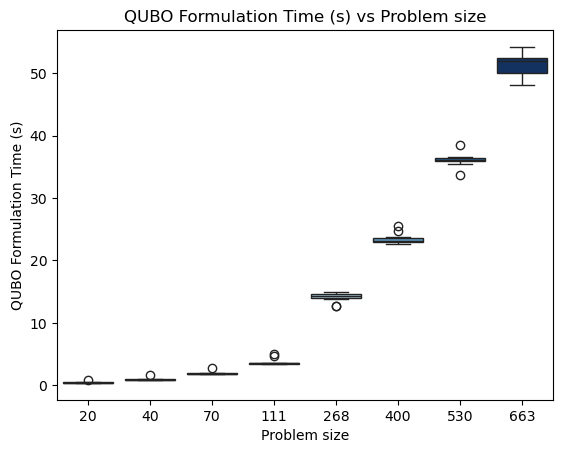

In [9]:
# Data
values = qubo_formulation_time_all
x_labels = QUBO_size

# Flatten the data
y = [val for group in values for val in group]
x = [label for label, group in zip(x_labels, values) for _ in group]

# Plot
sns.boxplot(x=x, y=y, hue=x, palette="Blues", legend=False)

# Labels and title
plt.xlabel("Problem size")
plt.ylabel("QUBO Formulation Time (s)")
plt.title("QUBO Formulation Time (s) vs Problem size")
plt.show()

In [10]:
counter = 1
model_formulation_time_all = []
for benchmarkSet in results:
    if counter == 1:
        model_formulation_time_problem = []
    if counter <= 10:
        model_formulation_time_problem.append(float(benchmarkSet["parameters"]["model_formulation_time"]))
        counter += 1
    if counter == 11:
        model_formulation_time_all.append(model_formulation_time_problem)
        counter = 1

for each in model_formulation_time_all:
    print(each)

[0.0009887218475341797, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0010006427764892578, 0.0010008811950683594]
[0.0010075569152832031, 0.0009984970092773438, 0.0010001659393310547, 0.0010006427764892578, 0.0009763240814208984, 0.0009992122650146484, 0.0010004043579101562, 0.001039743423461914, 0.0009968280792236328, 0.00099945068359375]
[0.001994609832763672, 0.002996683120727539, 0.0030002593994140625, 0.0019998550415039062, 0.0029993057250976562, 0.002000093460083008, 0.002033710479736328, 0.002000570297241211, 0.003002643585205078, 0.0029921531677246094]
[0.005991458892822266, 0.006000518798828125, 0.0060007572174072266, 0.005000591278076172, 0.006003141403198242, 0.00599980354309082, 0.006007194519042969, 0.005964994430541992, 0.005999565124511719, 0.006003141403198242]
[0.03399968147277832, 0.03603529930114746, 0.0350031852722168, 0.035036563873291016, 0.03599977493286133, 0.03799581527709961, 0.03501009941101074, 0.0350346565246582, 0.03400158882141113, 0.03300285339355469]
[0.07886075

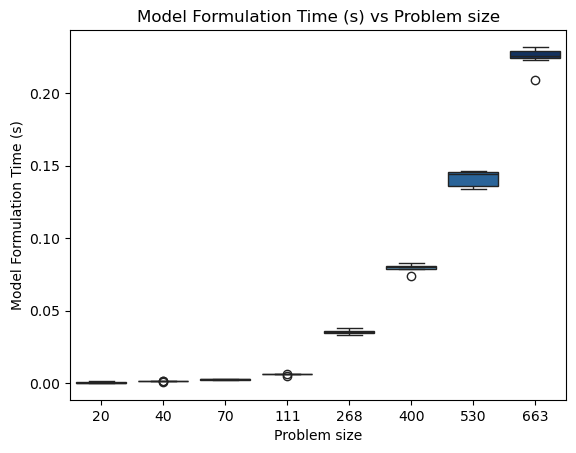

In [11]:
# Data
values = model_formulation_time_all
x_labels = QUBO_size

# Flatten the data
y = [val for group in values for val in group]
x = [label for label, group in zip(x_labels, values) for _ in group]

# Plot
sns.boxplot(x=x, y=y, hue=x, palette="Blues", legend=False)

# Labels and title
plt.xlabel("Problem size")
plt.ylabel("Model Formulation Time (s)")
plt.title("Model Formulation Time (s) vs Problem size")
plt.show()

In [11]:
solver_result_all_time = []
solver_result_all_verified = []
solver_result_all_obj = []

for name in solvers_name:
    list_of_ten = [[] for _ in range(10)]
    solver_result_all_time.append(list_of_ten)
    list_of_ten = [[] for _ in range(10)]
    solver_result_all_verified.append(list_of_ten)
    list_of_ten = [[] for _ in range(10)]
    solver_result_all_obj.append(list_of_ten)

prob_counter = 0
solver_num = 0
iteration = 1
for benchmarkSet in results:
    for solver_result in benchmarkSet["iteration_results"]:
        try:
            execution_time = float(solver_result["results"]["execution_time"])
            max_clauses_satisfied_Verified = float(solver_result["results"]["max_clauses_satisfied_Verified"])
            max_clauses_satisfied_Obj = float(solver_result["results"]["max_clauses_satisfied_Obj"])
        except:
            execution_time = 0
            max_clauses_satisfied_Verified = 0
            max_clauses_satisfied_Obj = 0
        solver_result_all_time[solver_num][prob_counter].append(execution_time)
        solver_result_all_verified[solver_num][prob_counter].append(max_clauses_satisfied_Verified / benchmarkSets_clauses_count[prob_counter])
        solver_result_all_obj[solver_num][prob_counter].append(max_clauses_satisfied_Obj / benchmarkSets_clauses_count[prob_counter])

        solver_num += 1
    solver_num = 0
    iteration += 1
    if (iteration == 11):
        prob_counter += 1
        iteration = 1


In [12]:
# Cut out errors (All 0s)
for solver in solver_result_all_time:
    solver[:] = [prob for prob in solver if sum(prob) != 0]
for solver in solver_result_all_verified:
    solver[:] = [prob for prob in solver if sum(prob) != 0]
for solver in solver_result_all_obj:
    solver[:] = [prob for prob in solver if sum(prob) != 0]

In [13]:
# Cut outlier
solver_result_all_time[7] = solver_result_all_time[7][:2]
solver_result_all_verified[7] = solver_result_all_verified[7][:2]
solver_result_all_obj[7] = solver_result_all_obj[7][:2]

In [14]:
for solver in range(8):
    print(solver_result_all_time[solver])
print("=============================================================")
for solver in range(8):
    print(solver_result_all_verified[solver])
print("=============================================================")
for solver in range(8):
    print(solver_result_all_obj[solver])

[[0.0608, 0.060395, 0.070099, 0.060201, 0.060281, 0.069927, 0.060595, 0.060796, 0.061308, 0.060472], [0.059486, 0.209645, 0.129744, 0.059995, 0.05938, 0.068333, 0.059277, 0.068786, 0.059764, 0.129641], [0.188817, 0.05326, 0.510175, 0.189798, 0.053581, 0.053628, 0.30039, 0.053341, 0.053804, 0.13533], [0.276735, 0.190976, 0.485674, 0.193169, 0.279091, 0.276447, 0.062757, 0.063202, 0.192509, 0.190591], [0.991995, 0.228185, 0.445053, 0.439428, 0.325317, 0.364978, 0.22848, 0.900057, 0.353624, 0.326493], [0.538505, 0.773396, 0.986653, 0.820964, 0.516936, 0.496884, 0.307824, 0.77307, 0.628888, 0.19613], [0.220383, 0.346733, 0.318061, 0.222266, 0.551729, 0.31496, 0.315406, 0.705963, 0.554479, 0.562198], [0.969698, 0.618596, 0.606137, 0.50286, 0.474781, 0.621738, 0.357199, 0.356726, 0.639575, 0.63826], [0.623829, 0.495483, 0.794363, 0.617371, 0.67129, 0.970964, 0.483204, 0.515161, 0.359115, 0.968884], [0.984191, 0.251983, 0.831867, 1.000983, 0.633511, 0.252085, 0.792222, 0.782028, 0.994971, 0.8

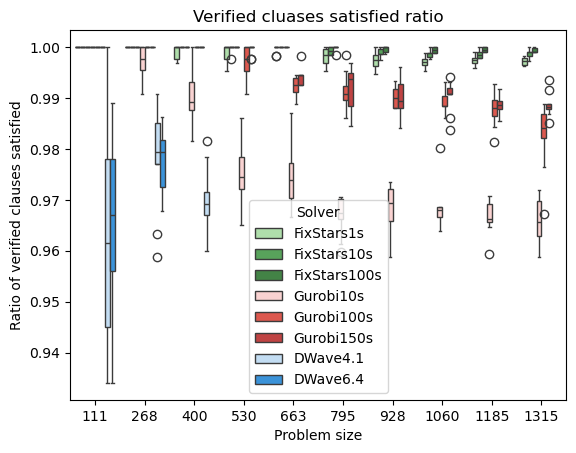

In [15]:
# Data
FixStars1s = solver_result_all_verified[0]
FixStars10s = solver_result_all_verified[1]
FixStars100s = solver_result_all_verified[2]
Gurobi10s = solver_result_all_verified[3]
Gurobi100s = solver_result_all_verified[4]
Gurobi150s = solver_result_all_verified[5]
DWave41 = solver_result_all_verified[6]
DWave64 = solver_result_all_verified[7]
x_labels = QUBO_size

# Flatten the data
x = ([label for label, group in zip(x_labels, FixStars1s) for _ in group] +
     [label for label, group in zip(x_labels, FixStars10s) for _ in group] +
     [label for label, group in zip(x_labels, FixStars100s) for _ in group] +
     [label for label, group in zip(x_labels, Gurobi10s) for _ in group] +
     [label for label, group in zip(x_labels, Gurobi100s) for _ in group] +
     [label for label, group in zip(x_labels, Gurobi150s) for _ in group] +
     [label for label, group in zip(x_labels, DWave41) for _ in group] +
     [label for label, group in zip(x_labels, DWave64) for _ in group])
y = ([val for group in FixStars1s for val in group] + 
     [val for group in FixStars10s for val in group] + 
     [val for group in FixStars100s for val in group] + 
     [val for group in Gurobi10s for val in group] + 
     [val for group in Gurobi100s for val in group] + 
     [val for group in Gurobi150s for val in group] + 
     [val for group in DWave41 for val in group] + 
     [val for group in DWave64 for val in group])
solver = (["FixStars1s"] * sum(len(group) for group in FixStars1s) +
          ["FixStars10s"] * sum(len(group) for group in FixStars10s) +
          ["FixStars100s"] * sum(len(group) for group in FixStars100s) +
          ["Gurobi10s"] * sum(len(group) for group in Gurobi10s) +
          ["Gurobi100s"] * sum(len(group) for group in Gurobi100s) +
          ["Gurobi150s"] * sum(len(group) for group in Gurobi150s) +
          ["DWave4.1"] * sum(len(group) for group in DWave41) +
          ["DWave6.4"] * sum(len(group) for group in DWave64))

# Plot
custom_palette = [
    "#A8E6A3",  # Light Green
    "#4CAF50",   # Green
    "#388E3C",   # Dark Green
    "#FFCCCB",   # Light Red
    "#F44336",   # Red
    "#D32F2F",   # Dark Red
    "#BBDEFB",   # Light Blue
    "#2196F3"    # Blue
]
sns.boxplot(x=x, y=y, hue=solver, palette=custom_palette)

# Labels and title
plt.xlabel("Problem size")
plt.ylabel("Ratio of verified clauses satisfied")
plt.title("Verified cluases satisfied ratio")
plt.legend(title="Solver")
plt.show()


USe fixstars1s, fixstar10s, gurobi10s, gurobi100s end at 663 range 20 40 70  Use same problem no need to random

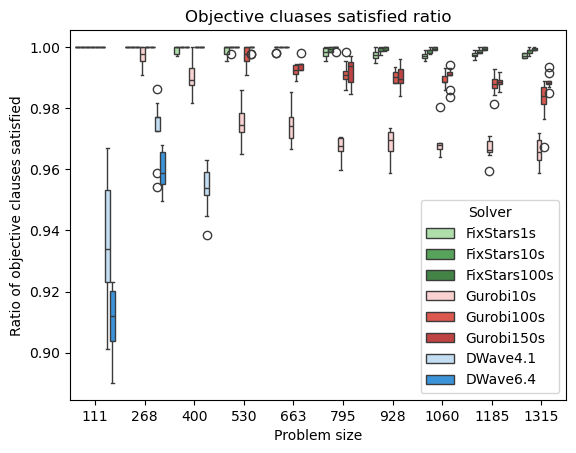

In [47]:
# Data
FixStars1s = solver_result_all_obj[0]
FixStars10s = solver_result_all_obj[1]
FixStars100s = solver_result_all_obj[2]
Gurobi10s = solver_result_all_obj[3]
Gurobi100s = solver_result_all_obj[4]
Gurobi150s = solver_result_all_obj[5]
DWave41 = solver_result_all_obj[6]
DWave64 = solver_result_all_obj[7]
x_labels = QUBO_size

# Flatten the data
x = ([label for label, group in zip(x_labels, FixStars1s) for _ in group] +
     [label for label, group in zip(x_labels, FixStars10s) for _ in group] +
     [label for label, group in zip(x_labels, FixStars100s) for _ in group] +
     [label for label, group in zip(x_labels, Gurobi10s) for _ in group] +
     [label for label, group in zip(x_labels, Gurobi100s) for _ in group] +
     [label for label, group in zip(x_labels, Gurobi150s) for _ in group] +
     [label for label, group in zip(x_labels, DWave41) for _ in group] +
     [label for label, group in zip(x_labels, DWave64) for _ in group])
y = ([val for group in FixStars1s for val in group] + 
     [val for group in FixStars10s for val in group] + 
     [val for group in FixStars100s for val in group] + 
     [val for group in Gurobi10s for val in group] + 
     [val for group in Gurobi100s for val in group] + 
     [val for group in Gurobi150s for val in group] + 
     [val for group in DWave41 for val in group] + 
     [val for group in DWave64 for val in group])
solver = (["FixStars1s"] * sum(len(group) for group in FixStars1s) +
          ["FixStars10s"] * sum(len(group) for group in FixStars10s) +
          ["FixStars100s"] * sum(len(group) for group in FixStars100s) +
          ["Gurobi10s"] * sum(len(group) for group in Gurobi10s) +
          ["Gurobi100s"] * sum(len(group) for group in Gurobi100s) +
          ["Gurobi150s"] * sum(len(group) for group in Gurobi150s) +
          ["DWave4.1"] * sum(len(group) for group in DWave41) +
          ["DWave6.4"] * sum(len(group) for group in DWave64))

# Plot
custom_palette = [
    "#A8E6A3",  # Light Green
    "#4CAF50",   # Green
    "#388E3C",   # Dark Green
    "#FFCCCB",   # Light Red
    "#F44336",   # Red
    "#D32F2F",   # Dark Red
    "#BBDEFB",   # Light Blue
    "#2196F3"    # Blue
]
sns.boxplot(x=x, y=y, hue=solver, palette=custom_palette)

# Labels and title
plt.xlabel("Problem size")
plt.ylabel("Ratio of objective clauses satisfied")
plt.title("Objective cluases satisfied ratio")
plt.legend(title="Solver")
plt.show()


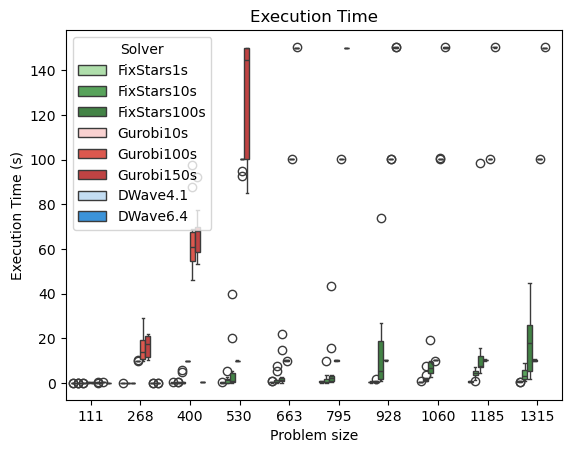

In [48]:
# Data
FixStars1s = solver_result_all_time[0]
FixStars10s = solver_result_all_time[1]
FixStars100s = solver_result_all_time[2]
Gurobi10s = solver_result_all_time[3]
Gurobi100s = solver_result_all_time[4]
Gurobi150s = solver_result_all_time[5]
DWave41 = solver_result_all_time[6]
DWave64 = solver_result_all_time[7]
x_labels = QUBO_size

# Flatten the data
x = ([label for label, group in zip(x_labels, FixStars1s) for _ in group] +
     [label for label, group in zip(x_labels, FixStars10s) for _ in group] +
     [label for label, group in zip(x_labels, FixStars100s) for _ in group] +
     [label for label, group in zip(x_labels, Gurobi10s) for _ in group] +
     [label for label, group in zip(x_labels, Gurobi100s) for _ in group] +
     [label for label, group in zip(x_labels, Gurobi150s) for _ in group] +
     [label for label, group in zip(x_labels, DWave41) for _ in group] +
     [label for label, group in zip(x_labels, DWave64) for _ in group])
y = ([val for group in FixStars1s for val in group] + 
     [val for group in FixStars10s for val in group] + 
     [val for group in FixStars100s for val in group] + 
     [val for group in Gurobi10s for val in group] + 
     [val for group in Gurobi100s for val in group] + 
     [val for group in Gurobi150s for val in group] + 
     [val for group in DWave41 for val in group] + 
     [val for group in DWave64 for val in group])
solver = (["FixStars1s"] * sum(len(group) for group in FixStars1s) +
          ["FixStars10s"] * sum(len(group) for group in FixStars10s) +
          ["FixStars100s"] * sum(len(group) for group in FixStars100s) +
          ["Gurobi10s"] * sum(len(group) for group in Gurobi10s) +
          ["Gurobi100s"] * sum(len(group) for group in Gurobi100s) +
          ["Gurobi150s"] * sum(len(group) for group in Gurobi150s) +
          ["DWave4.1"] * sum(len(group) for group in DWave41) +
          ["DWave6.4"] * sum(len(group) for group in DWave64))

# Plot
custom_palette = [
    "#A8E6A3",  # Light Green
    "#4CAF50",   # Green
    "#388E3C",   # Dark Green
    "#FFCCCB",   # Light Red
    "#F44336",   # Red
    "#D32F2F",   # Dark Red
    "#BBDEFB",   # Light Blue
    "#2196F3"    # Blue
]
sns.boxplot(x=x, y=y, hue=solver, palette=custom_palette)

# Labels and title
plt.xlabel("Problem size")
plt.ylabel("Execution Time (s)")
plt.title("Execution Time")
plt.legend(title="Solver")
plt.show()

time avg